In [2]:
!pip install tensorflow

In [4]:
# Imports and Setup
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [5]:
# Create a sample input image (6x6 grayscale)
image = np.array([
    [1, 2, 1, 0, 0, 0],
    [4, 5, 2, 0, 0, 0],
    [1, 2, 1, 0, 0, 0],
    [0, 1, 3, 2, 2, 0],
    [0, 1, 4, 4, 4, 0],
    [0, 1, 2, 3, 3, 0]
], dtype=np.float32)

# Reshape for TF model: (batch_size, height, width, channels)
image_tf = image.reshape((1, 6, 6, 1))

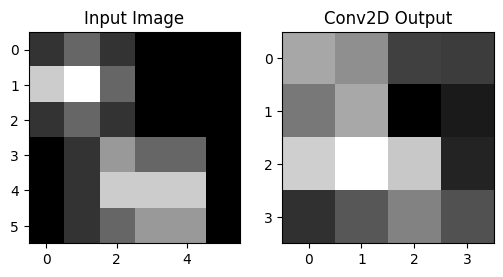

In [6]:
# Conv2D Layer
conv_layer = layers.Conv2D(filters=1, kernel_size=3, strides=1, padding='valid', use_bias=False)
model_conv = models.Sequential([conv_layer])
conv_output = model_conv(image_tf)

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Conv2D Output")
plt.imshow(conv_output[0, :, :, 0], cmap='gray')
plt.show()

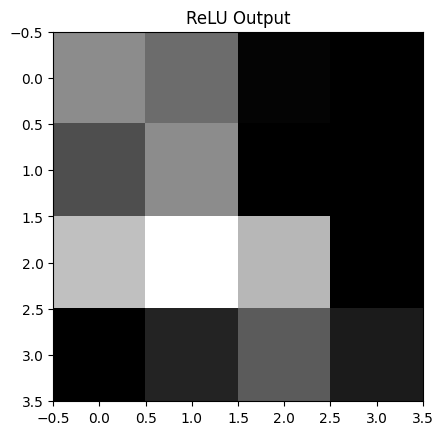

In [7]:
# 2. ReLU Activation Layer
relu_layer = layers.ReLU()
model_relu = models.Sequential([conv_layer, relu_layer])
relu_output = model_relu(image_tf)

plt.title("ReLU Output")
plt.imshow(relu_output[0, :, :, 0], cmap='gray')
plt.show()

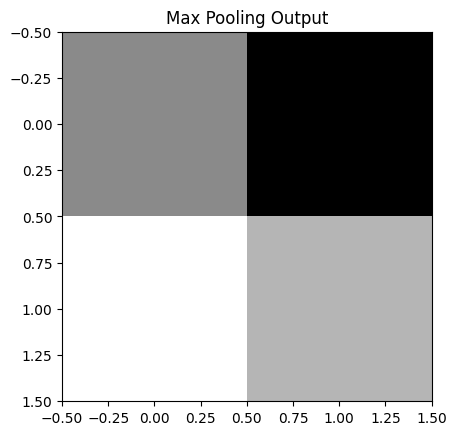

In [8]:
# 3. MaxPooling2D Layer
pool_layer = layers.MaxPooling2D(pool_size=(2, 2), strides=2)
model_pool = models.Sequential([conv_layer, relu_layer, pool_layer])
pool_output = model_pool(image_tf)

plt.title("Max Pooling Output")
plt.imshow(pool_output[0, :, :, 0], cmap='gray')
plt.show()

In [13]:
# 4. Fully Connected Layer
flatten_layer = layers.Flatten()
dense_layer = layers.Dense(units=3)  # 3 classes
model_fc = models.Sequential([conv_layer, relu_layer, pool_layer, flatten_layer, dense_layer])
fc_output = model_fc(image_tf)

print("Fully Connected Output:", fc_output.numpy())

Fully Connected Output: [[-0.00380164  1.6690705   1.0062015 ]]


In [10]:
flatten_layer

<Flatten name=flatten, built=True>

Softmax Probabilities: [[0.07322402 0.5056782  0.42109782]]


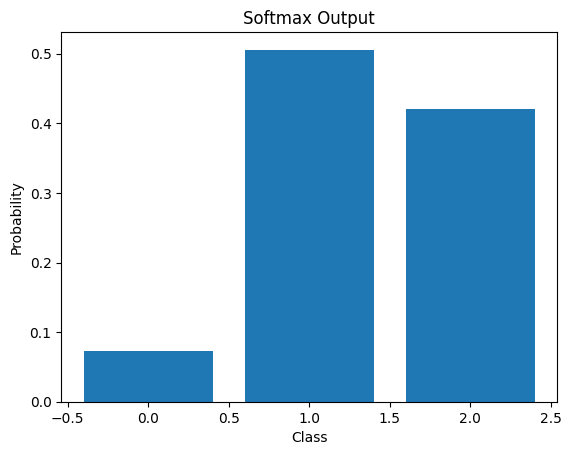

In [12]:
# 5. Softmax Layer
softmax_layer = layers.Softmax()
model_softmax = models.Sequential([
    conv_layer, relu_layer, pool_layer,
    flatten_layer, dense_layer, softmax_layer
])
softmax_output = model_softmax(image_tf)

print("Softmax Probabilities:", softmax_output.numpy())

# Visualize class probabilities
plt.bar(range(3), softmax_output.numpy()[0])
plt.title("Softmax Output")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [15]:
model_softmax.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (1, 4, 4, 1)           │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (1, 4, 4, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (1, 2, 2, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (1, 4)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 3)                 │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (1, 3)                 │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 51s 58ms/step - accuracy: 0.8709 - loss: 0.4224 - val_accuracy: 0.9843 - val_loss: 0.0568
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9836 - loss: 0.0563 - val_accuracy: 0.9865 - val_loss: 0.0433
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9874 - loss: 0.0404 - val_accuracy: 0.9882 - val_loss: 0.0436
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9913 - loss: 0.0288 - val_accuracy: 0.9900 - val_loss: 0.0337
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9927 - loss: 0.0226 - val_accuracy: 0.9897 - val_loss: 0.0411
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9851 - loss: 0.0454

Test accuracy: 0.9879
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


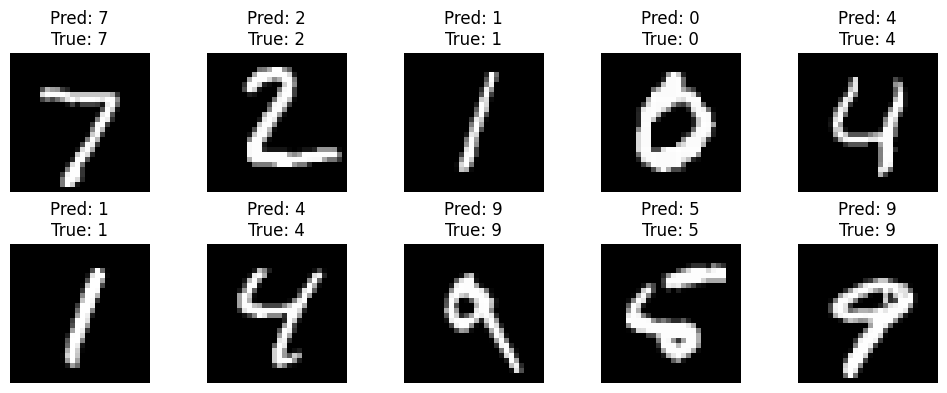

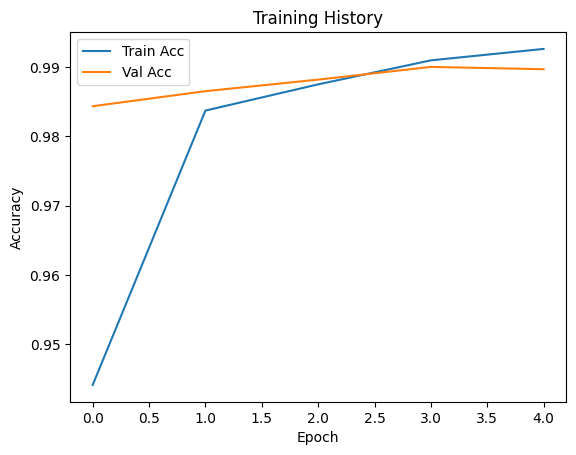

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# 1. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize images to the range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension (batch, height, width, channel)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# 2. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 3. Train model
history = model.fit(x_train, y_train_cat, epochs=5,
                    validation_split=0.1, batch_size=64)

# 4. Evaluate model on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest accuracy: {test_acc:.4f}")

# 5. Run inference on sample test images
pred_probs = model.predict(x_test[:10])
pred_classes = np.argmax(pred_probs, axis=1)

# 6. Visualize predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {pred_classes[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.3260 - loss: 1.4771 - val_accuracy: 0.4167 - val_loss: 1.4735
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3255 - loss: 1.3900 - val_accuracy: 0.4167 - val_loss: 1.3926
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3522 - loss: 1.2744 - val_accuracy: 0.4167 - val_loss: 1.3130
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3030 - loss: 1.2447 - val_accuracy: 0.2500 - val_loss: 1.2398
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3032 - loss: 1.1391 - val_accuracy: 0.1667 - val_loss: 1.1754
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4302 - loss: 1.0886 - val_accuracy: 0.1667 - val_loss: 1.1109
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4778 - loss: 1.0058 - val_accuracy: 0.3333 - val_loss: 1.0551
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6385 - loss: 0.9365 - val_accuracy: 0.6667 - 

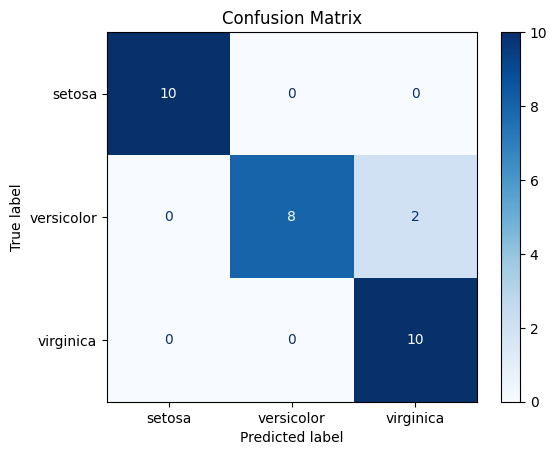

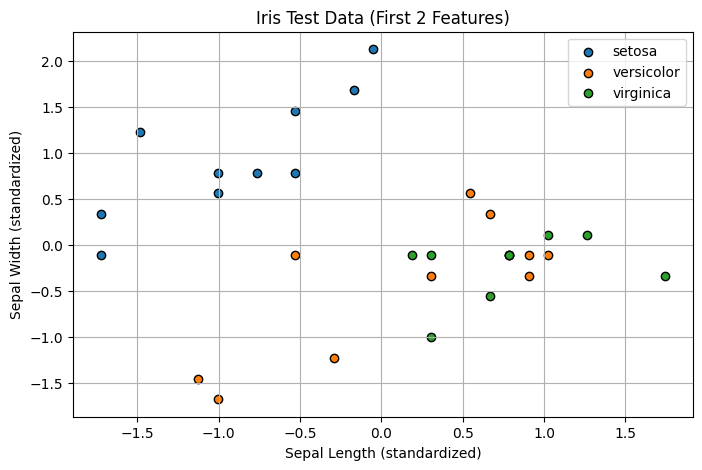

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode target
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# 2. Build the MLP model
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 3. Train the model
history = model.fit(X_train, y_train_cat,
                    validation_split=0.1,
                    epochs=50,
                    batch_size=8,
                    verbose=1)

# 4. Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predict
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# 5. Visualization - Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 6. Visualization - Feature Scatter Plot (First 2 features)
plt.figure(figsize=(8, 5))
for i in range(3):
    idx = np.where(y_test == i)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], label=class_names[i], edgecolors='k')
plt.title("Iris Test Data (First 2 Features)")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.legend()
plt.grid(True)
plt.show()
